In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import seaborn as sns

In [2]:
cf.go_offline()

In [3]:
# Import DataSet

df = pd.read_csv('../data/diamonds_train.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


## Challenge 1: Exploratory Data Visualization Charts and Summary Statistics

In [4]:
# To check the types, use dtypes

df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
# To check main statisticals parameters of numerical Columns, use describe function.

df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [6]:
# Now we check the unique values of categorical Columns (cut, color and clarity).

print(f'Cut:{df.cut.unique()}\nColor:{df.color.unique()}\nClarity:{df.clarity.unique()}')

Cut:['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
Color:['J' 'H' 'G' 'D' 'F' 'E' 'I']
Clarity:['VS2' 'VS1' 'SI1' 'SI2' 'IF' 'VVS1' 'VVS2' 'I1']


### Correlation (HeatMap)

<AxesSubplot:>

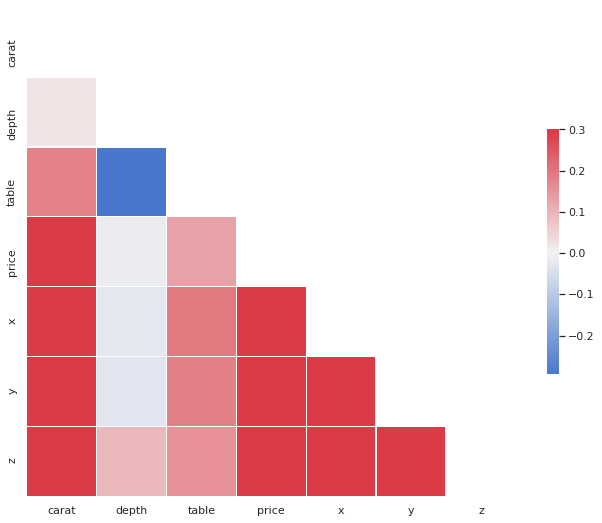

In [7]:
# A Heat Map is a useful tool to check which is the correlation between columns in a dataset.

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Based on graph above, we can study the relation between the diamond price and other features, such as carat (if you don't know, diamond carat weight measures how much a diamond weighs.
A metric “carat” is defined as 200 milligrams and each carat is subdivided into 100 ‘points.’).

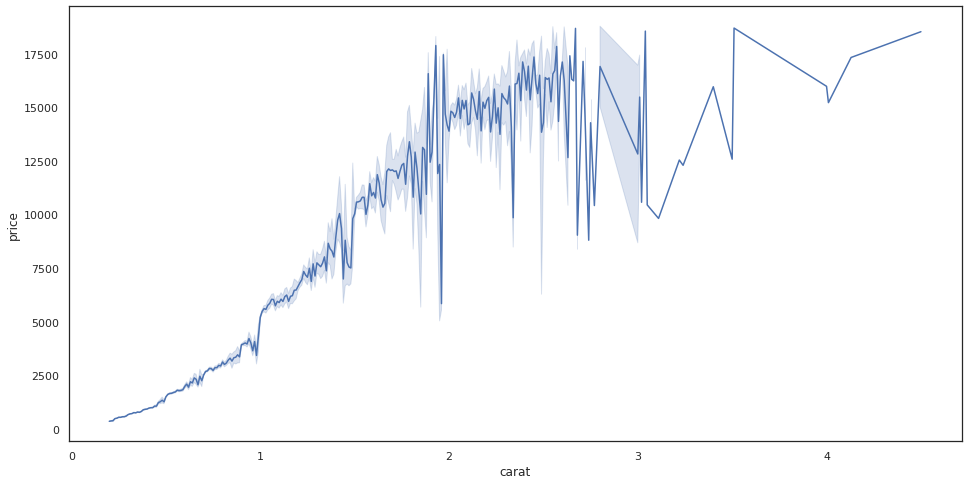

In [17]:
fig = plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='carat', y='price', data=df)